In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt
import seaborn as sns
import os


# ===============================================
# 1. 데이터 로드 및 전처리
# ===============================================
df = pd.read_excel('20-24Year_PersonalStats_PAOver50pct.xlsx')
df.columns = [col.lower().strip() for col in df.columns]

print(df.columns.tolist())

['name', 'year', 'position', 'war', 'g', 'owar', 'dwar', 'pa', 'epa', 'ab', 'r', 'h', '2b', '3b', 'hr', 'tb', 'rbi', 'sb', 'cs', 'bb', 'hp', 'ib', 'so', 'gdp', 'sh', 'sf', 'avg', 'obp', 'slg', 'ops', 'r/epa', 'wrc+', 'team']


In [2]:
# 필요한 컬럼만 추출 및 결측 제거
required_cols = ['name', 'team', 'year', 'position', 'bb', 'so', 'avg', 'obp', 'slg', 'ops', 'sb','hr']
df = df[required_cols].dropna()

# ===============================================
# 2. 통합 점수 계산 (Z-score + 가중치 방식)
# ===============================================
weights = {
    'ops': 0.4,
    'slg': 0.2,
    'obp': 0.2,
    'avg': 0.1,
    'bb': 0.05,
    'hr': 0.04,
    'sb': 0.01
}
X = df[list(weights.keys())]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
df_scaled = pd.DataFrame(X_scaled, columns=weights.keys())
df['통합점수'] = sum(df_scaled[col] * w for col, w in weights.items())


In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# 1. 컬럼 정규화
df.columns = [col.strip().lower() for col in df.columns]

# 2. feature 선택
features = ['sb', 'bb', 'so', 'avg', 'obp', 'slg', 'ops','hr']

# 3. 정규화 + 클러스터링
X_cluster = StandardScaler().fit_transform(df[features])
df_cluster = df.copy()
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
df_cluster["클러스터"] = kmeans.fit_predict(X_cluster)

# 4. 클러스터 → 성향 이름 매핑
label_map = {
    0: "power hitter",
    1: "on-base type",
    2: "contact type",
    3: "base running type"
}
df_cluster["성향"] = df_cluster["클러스터"].map(label_map)

# 5. 결과 확인
print(df_cluster[['name', 'year', 'team', '성향', '클러스터'] + features].head())


    name  year team            성향  클러스터  sb  bb   so    avg    obp    slg  \
0    김도영    24  KIA  contact type     2  40  66  110  0.347  0.420  0.647   
1    나성범    22  KIA  contact type     2   6  64  137  0.320  0.402  0.508   
2    최형우    20  KIA  contact type     2   0  70  101  0.354  0.433  0.590   
3     터커    20  KIA  contact type     2   0  76   67  0.306  0.398  0.557   
4  소크라테스    22  KIA  on-base type     1  12  34   81  0.311  0.354  0.494   

     ops  hr  
0  1.067  38  
1  0.910  21  
2  1.023  28  
3  0.955  32  
4  0.848  17  


C:\Users\ksch0\AppData\Local\Temp\ipykernel_7464\692039148.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_cluster[df_cluster['year'] == year], x='성향', palette='Set2')


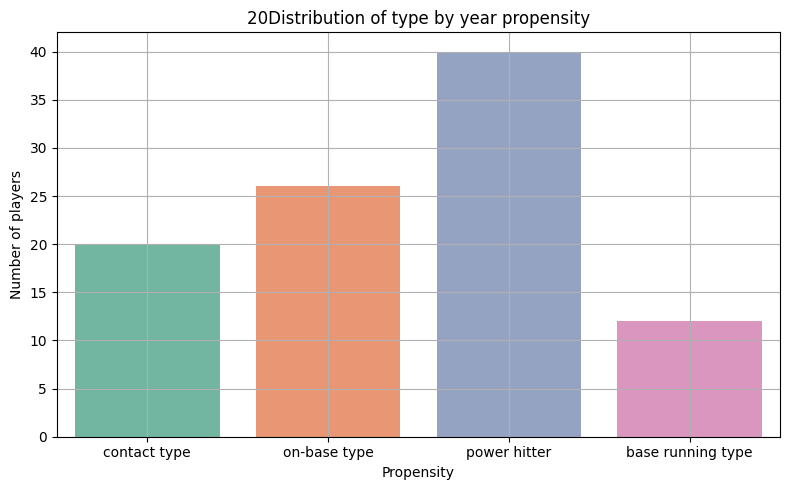

C:\Users\ksch0\AppData\Local\Temp\ipykernel_7464\692039148.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_cluster[df_cluster['year'] == year], x='성향', palette='Set2')


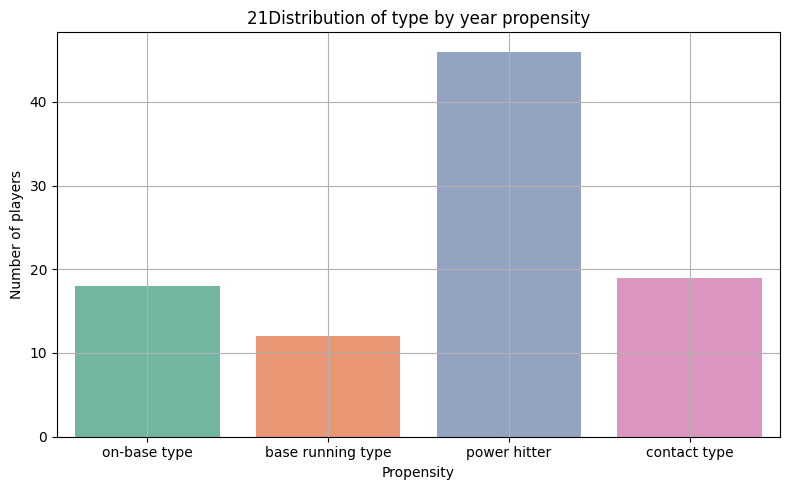

C:\Users\ksch0\AppData\Local\Temp\ipykernel_7464\692039148.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_cluster[df_cluster['year'] == year], x='성향', palette='Set2')


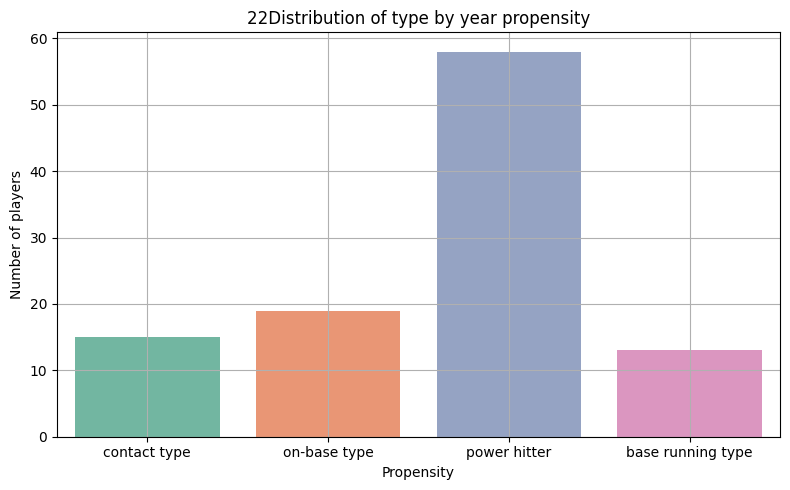

C:\Users\ksch0\AppData\Local\Temp\ipykernel_7464\692039148.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_cluster[df_cluster['year'] == year], x='성향', palette='Set2')


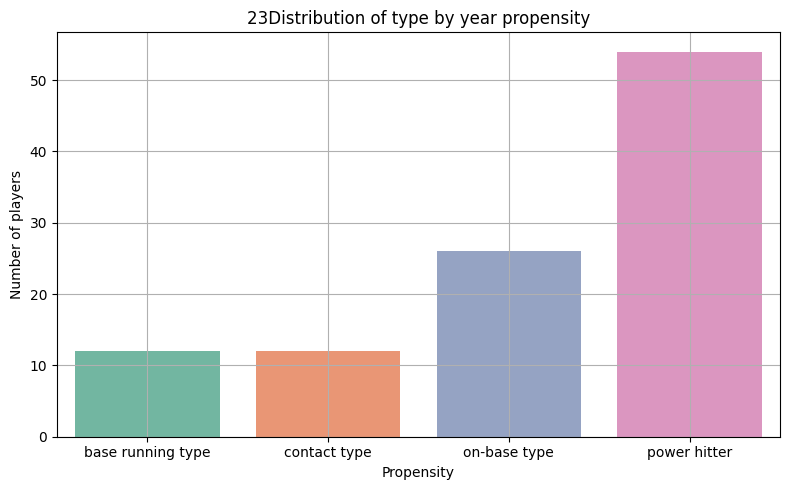

C:\Users\ksch0\AppData\Local\Temp\ipykernel_7464\692039148.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_cluster[df_cluster['year'] == year], x='성향', palette='Set2')


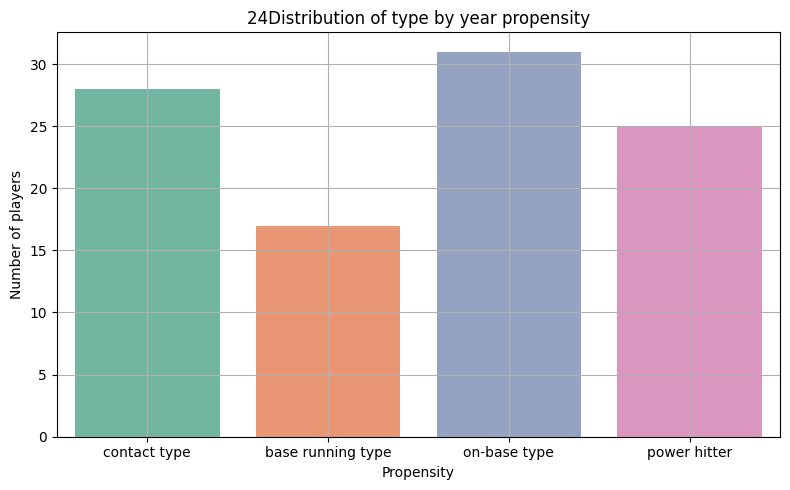

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# 연도별로 반복 출력
for year in sorted(df_cluster['year'].unique()):
    plt.figure(figsize=(8, 5))
    sns.countplot(data=df_cluster[df_cluster['year'] == year], x='성향', palette='Set2')
    plt.title(f"{year}Distribution of type by year propensity") #년도 성향별 타자 분포
    plt.ylabel("Number of players") #선수 수
    plt.xlabel("Propensity") #성향
    plt.grid(True)
    plt.tight_layout()
    plt.show()


C:\Users\ksch0\AppData\Local\Temp\ipykernel_7464\3282048576.py:19: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\ksch0\AppData\Local\Temp\ipykernel_7464\3282048576.py:19: UserWarning: Glyph 54693 (\N{HANGUL SYLLABLE HYANG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\ksch0\.conda\envs\tfenv\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\ksch0\.conda\envs\tfenv\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 54693 (\N{HANGUL SYLLABLE HYANG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


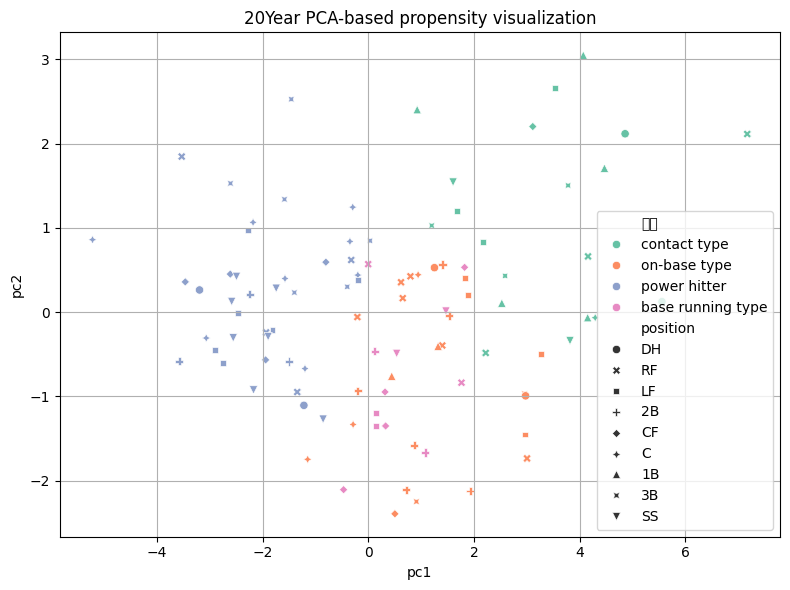

C:\Users\ksch0\AppData\Local\Temp\ipykernel_7464\3282048576.py:19: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\ksch0\AppData\Local\Temp\ipykernel_7464\3282048576.py:19: UserWarning: Glyph 54693 (\N{HANGUL SYLLABLE HYANG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\ksch0\.conda\envs\tfenv\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\ksch0\.conda\envs\tfenv\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 54693 (\N{HANGUL SYLLABLE HYANG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


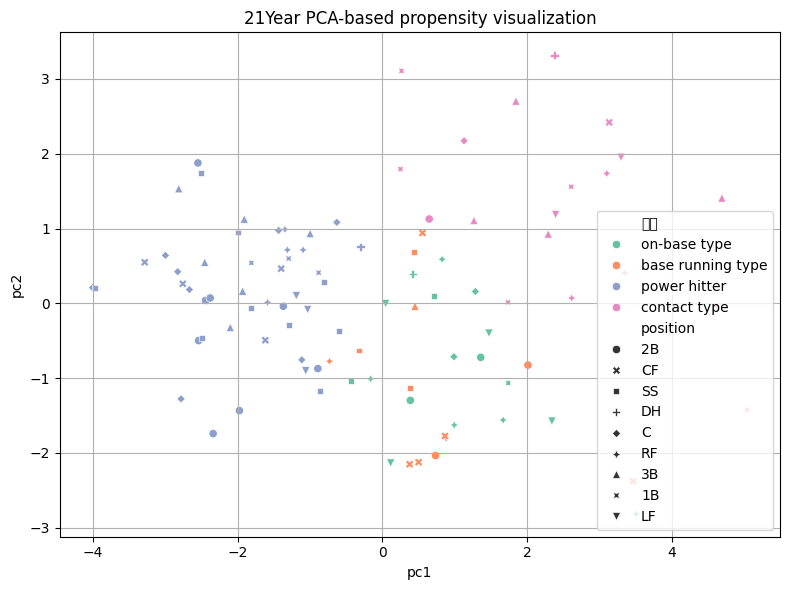

C:\Users\ksch0\AppData\Local\Temp\ipykernel_7464\3282048576.py:19: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\ksch0\AppData\Local\Temp\ipykernel_7464\3282048576.py:19: UserWarning: Glyph 54693 (\N{HANGUL SYLLABLE HYANG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\ksch0\.conda\envs\tfenv\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\ksch0\.conda\envs\tfenv\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 54693 (\N{HANGUL SYLLABLE HYANG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


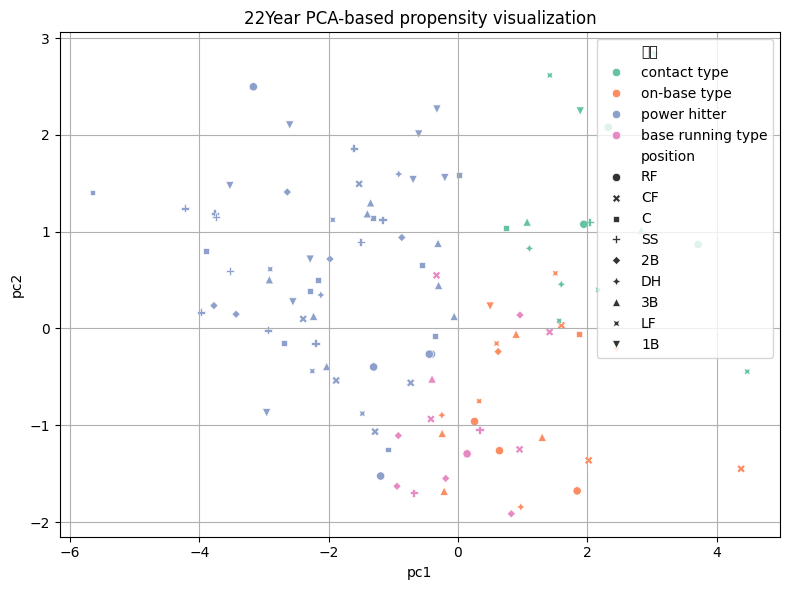

C:\Users\ksch0\AppData\Local\Temp\ipykernel_7464\3282048576.py:19: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\ksch0\AppData\Local\Temp\ipykernel_7464\3282048576.py:19: UserWarning: Glyph 54693 (\N{HANGUL SYLLABLE HYANG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\ksch0\.conda\envs\tfenv\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\ksch0\.conda\envs\tfenv\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 54693 (\N{HANGUL SYLLABLE HYANG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


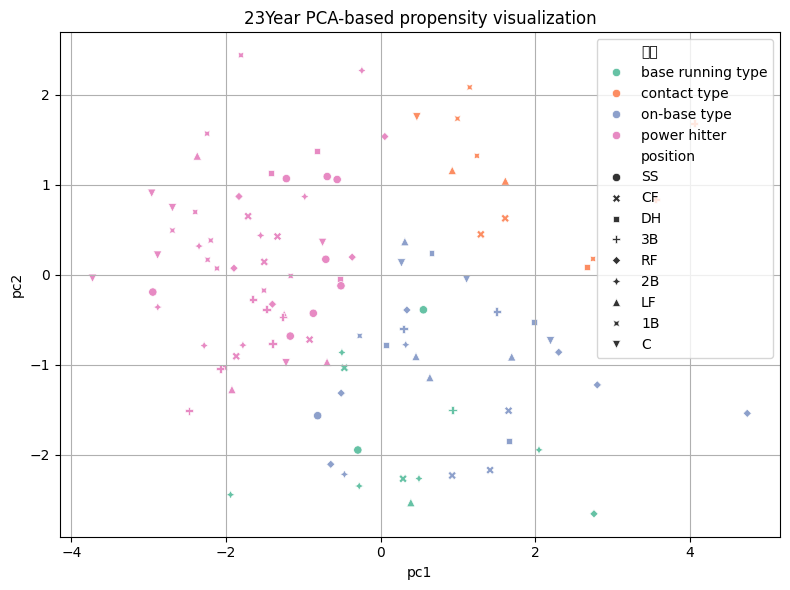

C:\Users\ksch0\AppData\Local\Temp\ipykernel_7464\3282048576.py:19: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\ksch0\AppData\Local\Temp\ipykernel_7464\3282048576.py:19: UserWarning: Glyph 54693 (\N{HANGUL SYLLABLE HYANG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\ksch0\.conda\envs\tfenv\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\ksch0\.conda\envs\tfenv\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 54693 (\N{HANGUL SYLLABLE HYANG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


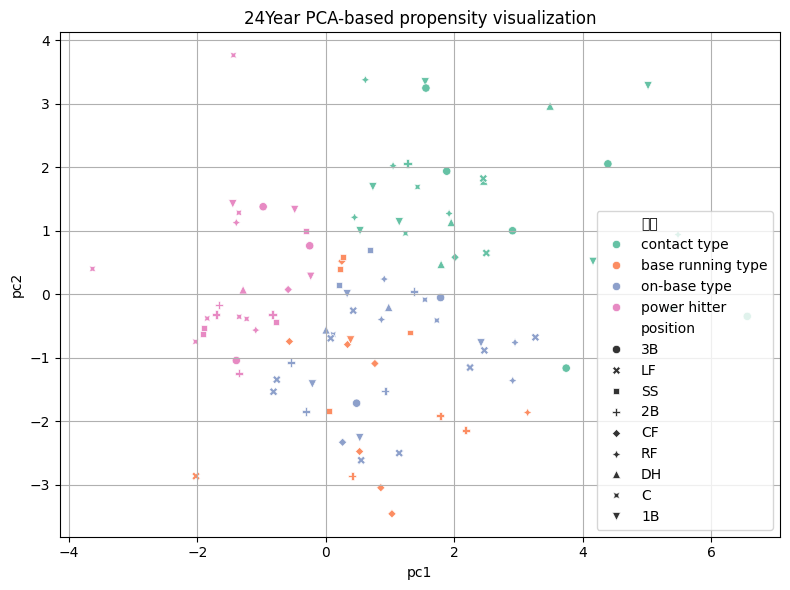

In [5]:
from sklearn.decomposition import PCA

# 주요 feature 스케일링
X_scaled = StandardScaler().fit_transform(df_cluster[features])
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# 결과 저장
df_cluster['pc1'] = X_pca[:, 0]
df_cluster['pc2'] = X_pca[:, 1]

# 연도별 시각화
for year in sorted(df_cluster['year'].unique()):
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=df_cluster[df_cluster['year'] == year],
                    x='pc1', y='pc2', hue='성향', style='position', palette='Set2')
    plt.title(f"{year}Year PCA-based propensity visualization") #년도 PCA 기반 성향 시각화
    plt.grid(True)
    plt.tight_layout()
    plt.show()


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# 학습용 feature + target
X = df_cluster[features]
y = df_cluster['클러스터']  # 성향을 숫자 기준으로 예측

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = {
    "RandomForest": RandomForestClassifier(),
    "LogisticRegression": LogisticRegression(max_iter=1000),
    "SVM": SVC()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"\n{name} 정확도: {acc:.3f}")
    print(classification_report(y_test, y_pred))



RandomForest 정확도: 0.960
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        44
           1       0.91      0.95      0.93        21
           2       1.00      0.96      0.98        23
           3       1.00      0.85      0.92        13

    accuracy                           0.96       101
   macro avg       0.97      0.94      0.95       101
weighted avg       0.96      0.96      0.96       101


LogisticRegression 정확도: 0.871
              precision    recall  f1-score   support

           0       0.84      0.93      0.88        44
           1       0.76      0.62      0.68        21
           2       1.00      0.96      0.98        23
           3       0.92      0.92      0.92        13

    accuracy                           0.87       101
   macro avg       0.88      0.86      0.87       101
weighted avg       0.87      0.87      0.87       101


SVM 정확도: 0.782
              precision    recall  f1-score   support

   

C:\Users\ksch0\.conda\envs\tfenv\lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [7]:
# 코드 상태 초기화로 인해 필요한 재작업 수행
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler



# 전체 데이터 통합
#df_cluster = pd.concat(df_all_years.values(), ignore_index=True)

# 주요 피처 정의
features = ['sb', 'bb', 'so', 'avg', 'obp', 'slg', 'ops', 'hr']

# 결측치 제거
df_cluster = df_cluster.dropna(subset=features + ['team', 'year'])

# 스케일링
scaler = StandardScaler()
X_scaled = pd.DataFrame(
    scaler.fit_transform(df_cluster[features]),
    columns=features
)

# 랜덤포레스트로 주요 변수 중요도 계산
rf = RandomForestClassifier(random_state=42)
rf.fit(X_scaled, df_cluster['team'])  # 팀명을 기반으로 피처 중요도 계산
top_features = pd.Series(
    rf.feature_importances_,
    index=features
).sort_values(ascending=False).head(5).index.tolist()

# 클러스터링 (상위 변수 기반)
X_cluster = X_scaled[top_features]
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
df_cluster['cluster'] = kmeans.fit_predict(X_cluster)

# 성향 라벨 부여
cluster_labels = {
    0: "Power Hitter (장타형)",
    1: "On-base Type (출루형)",
    2: "Contact Type (컨택형)",
    3: "Speed Type (주루형)"
}
df_cluster['성향'] = df_cluster['cluster'].map(cluster_labels)

# 연도별로 분할 및 저장 구조 준비
df_by_year = {
    year: sub_df.drop(columns='cluster')
    for year, sub_df in df_cluster.groupby('year')
}

# 저장 파일 경로 (현재 경로에 저장)
output_path = "KBO_Hitter_Tendency_Classification_byYear.xlsx"

with pd.ExcelWriter(output_path) as writer:
    for year, sub_df in df_by_year.items():
        sub_df.to_excel(writer, sheet_name=str(year), index=False)

print(f"엑셀 저장 완료: {output_path}")




엑셀 저장 완료: KBO_Hitter_Tendency_Classification_byYear.xlsx


In [8]:
# 연도별, 팀별, 성향별 요약 테이블
summary = df_cluster.groupby(['year', 'team', '성향']).size().reset_index(name='선수 수')

# 최종 결과 저장
df_cluster.to_excel("Overall_Tendency_Classification_Results.xlsx", index=False)
summary.to_excel("Yearly_Team_Tendency_Summary.xlsx", index=False)
print("✔️ 결과 저장 완료: Overall_Tendency_Classification_Results.xlsx, Yearly_Team_Tendency_Summary.xlsx")

✔️ 결과 저장 완료: Overall_Tendency_Classification_Results.xlsx, Yearly_Team_Tendency_Summary.xlsx
